<a href="https://colab.research.google.com/github/SebastianWikt/DS4002-P1/blob/main/Project_1_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importance of Word Choice in Education

### Group 5: Neha Channamraju (leader), Sebastian Wiktorowicz, Catherine Young

In [ ]:
#ONLY NEED TO RUN THIS ONE TIME
!pip install nltk
!pip install spacy
!pip install scikit-learn
!pip install textblob
!pip install wordcloud
!pip install pandas numpy matplotlib seaborn

#Install spacy extra data
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!rm -r DS4002-P1/

In [ ]:
! git clone https://github.com/SebastianWikt/DS4002-P1.git

fatal: destination path 'DS4002-P1' already exists and is not an empty directory.


In [ ]:
from typing_extensions import dataclass_transform
import os # to run file I/O operation
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re
import string
import datetime
from wordcloud import WordCloud
from textblob import TextBlob
import spacy
from collections import Counter
np.random.seed(42)

# Download necessary NLTK data
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger', 'stopwords'])

# Load English tokenizer, tagger, parser, NER, and word vectors from spacy
nlp = spacy.load('en_core_web_sm')

def loadData(file):
  # The column names are adopted from the dataset page on Kaggle
  df = pd.read_csv(file)
  return df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv('/content/DS4002-P1/project_1_dataset.csv')
data = data.rename(columns={"Unnamed: 42": "no_of_words"})

In [ ]:
print(data.columns)

Index(['Rank in 2020', 'Rank in 2019', 'Rank in 2018', '3 year average rank',
       'School name', 'Country', 'Audit year', 'Salary today (US$)',
       'Weighted salary (US$)', 'Salary percentage increase',
       'Value for money rank', 'Career progress rank', 'Aims achieved (%)',
       'Careers service rank', 'Employed at three months (%)',
       'Alumni recommend rank', 'Female faculty (%)', 'Female students (%)',
       'Women on board (%)', 'International faculty (%)',
       'International students (%)', 'International board (%)',
       'International mobility rank', 'International course experience rank',
       'Languages', 'Faculty with doctorates (%)', 'FT research rank',
       'CSR rank', 'Unnamed: 28', 'Value statement', 'No. of words', 'Clear',
       'Realistic', 'Shorter', 'Easy to communicate', 'Easy to memorize',
       'Easy to be explained', 'Focused', 'Unique', 'Decision Making guidance',
       'Challenging', 'Mission Statements', 'no_of_words', 'Customers',


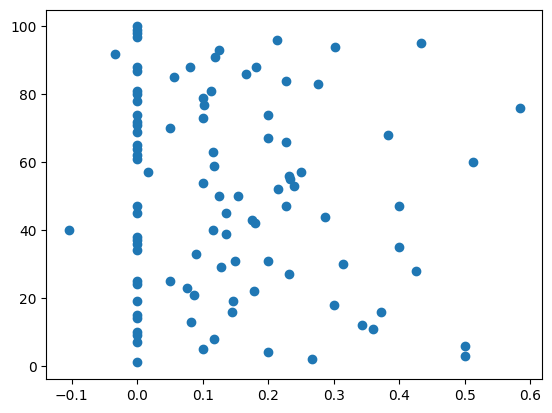

In [ ]:
# Import the TextBlob library
from textblob import TextBlob

# Define a function to calculate the polarity and subjectivity of a text
def get_sentiment(text):
	blob = TextBlob(text)
	return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the reviews
data['polarity'], data['subjectivity'] = zip(*data['Mission Statements'].astype(str).map(get_sentiment))

# Display the first few rows of the dataframe
plt.scatter(data['polarity'], data['Rank in 2020'])
plt.show()

In [ ]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()
# sia.polarity_scores("Wow, NLTK is really powerful!")

In [ ]:
def scatterAndLine(x, y):
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    plt.scatter(x, y)

    #add line of best fit to plot
    plt.plot(x, a*x+b)

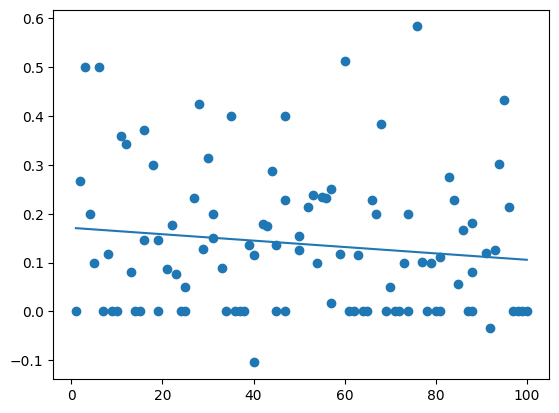

In [ ]:
scatterAndLine(data['Rank in 2020'], data['polarity'])

<Axes: xlabel='no_of_words', ylabel='Rank in 2020'>

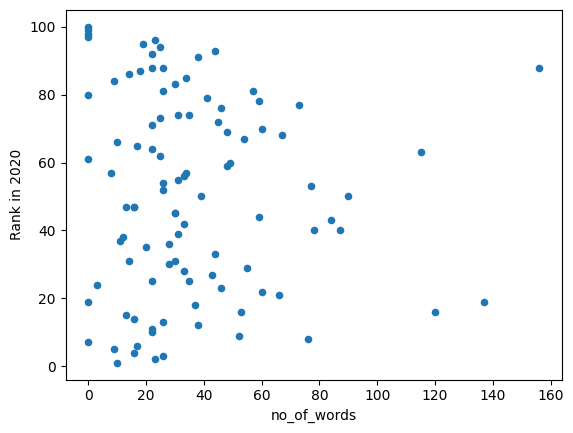

In [ ]:
# Plotting word length and ranking in 2020
lrank = data[['Rank in 2020', 'no_of_words']]
lrank.plot(kind='scatter', x='no_of_words', y='Rank in 2020')

In [ ]:
from scipy.stats import pointbiserialr

# Convert the 'Yes'/'No' column to numerical values (Yes=1, No=0)
      #  'Realistic', 'Shorter', 'Easy to communicate', 'Easy to memorize',
      #  'Easy to be explained', 'Focused', 'Unique',
data['binary_column'] = data['Easy to memorize'].apply(lambda x: 1 if x == 'Y' else 0)

# Calculate the point-biserial correlation between the binary column and the 'Rank in 2020'
print(data['binary_column'])
r_value, p_value = pointbiserialr(data['binary_column'], data['Rank in 2020'])
scatterAndLine(data['binary_column'], data['Rank in 2020'])

print(f"Point-biserial correlation coefficient: {r_value}")
print(f"P-value: {p_value}")